# Predicting Heart attack

###### Importing the libraries

In [40]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [41]:
heart=pd.read_csv("/Users/mohammedaminulfaaiz/Desktop/ML/heart.csv")
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [42]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [43]:
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [44]:
# Converting categorical coloumn into numerical coloumns
string_col = heart.select_dtypes(include="object").columns
heart[string_col]=heart[string_col].astype("string")

Why to do this???

Data Consistency: Coverting all the columns that are present in string format will treat the code uniformly

Type Safety: Using the String data type will cause problems while running machine learning algorithms

In [45]:
heart.dtypes

Age                        int64
Sex               string[python]
ChestPainType     string[python]
RestingBP                  int64
Cholesterol                int64
FastingBS                  int64
RestingECG        string[python]
MaxHR                      int64
ExerciseAngina    string[python]
Oldpeak                  float64
ST_Slope          string[python]
HeartDisease               int64
dtype: object

In the above cell we can see that all the object columns are converted to string

###### Extacting the Categorical columns

In [46]:
string_col=heart.select_dtypes("string").columns.to_list()

In [47]:
num_col=heart.columns.to_list()
for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")

## Exploratory Data Analysis

Understanding the given dataset and helps clean up the given dataset.
It gives you a clear picture of the features and the relationships between them.
Providing guidelines for essential variables and leaving behind/removing non-essential variables.
Handling Missing values or human error.
Identifying outliers.
EDA process would be maximizing insights of a dataset.
This process is time-consuming but very effective,

Why do we need to do EDA??
* To check the given dataset and to clean up the dataset
* It serves as a clear picture of the features and relationships
* It provides as a format for variables and non-essential variables
* It helps to find the outliers


##### Correlation Matrix

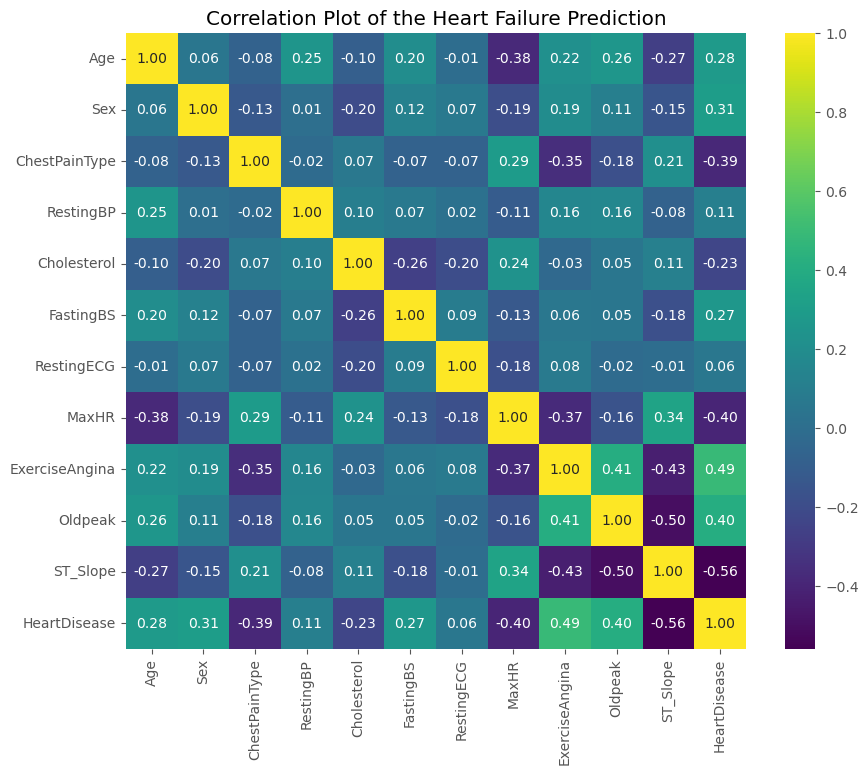

In [48]:
# Initialize label encoder
label_encoder = LabelEncoder()

# Convert non-numeric columns to numeric using label encoding
for column in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    heart[column] = label_encoder.fit_transform(heart[column])

# Compute the correlation matrix
correlation_matrix = heart.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title("Correlation Plot of the Heart Failure Prediction")
plt.show()

In [49]:
px.imshow(heart.corr(),title="Correlation Plot of the Heat Failure Prediction")


Here we can see Heart Disease has a high negative correlation with "MaxHR" and somewhat negative correlation wiht "Cholesterol", where as here positive correatlation with "Oldpeak","FastingBS" and "RestingBP".


In [50]:
# Shows the Distribution of Heart Diseases with respect to male and female
fig=px.histogram(heart, 
                 x="HeartDisease",
                 color="Sex",
                 hover_data=heart.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

In [73]:
# Shows the Chest Pain with respect to male and female

fig=px.histogram(heart,
                 x="ChestPainType",
                 color="Sex",
                 barmode="stack",
                 hover_data=heart.columns,
                 title="Types of Chest Pain")
fig.update_layout(bargap=0.2)
                 
fig.update_xaxes(
    tickvals=[0, 1, 2, 3],
    ticktext=['ATA', 'NAP', 'ASY', 'ATA']
)          
                
fig.show()


In [78]:
# Shows the Sex Ratio in the Data with respect to male and female

fig=px.histogram(heart,
                 x="Sex",
                 hover_data=heart.columns,
                 title="Sex Ratio in the Data")
fig.update_layout(bargap=0.2)
fig.update_xaxes(
    tickvals=[0, 1],
    ticktext=['F', 'M']
)
                 
fig.show()

In [79]:
# Shows the Distribution of Resting ECG with respect to male and female

fig=px.histogram(heart,
                 x="RestingECG",
                 hover_data=heart.columns,
                 title="Distribution of Resting ECG")
fig.update_layout(bargap=0.2)

fig.update_xaxes(
    tickvals=[0, 1, 2, 3],
    ticktext=['LVG', 'Normal', 'ST']
)


fig.show()

If you need to display all pairwise bivariate distributions of your data set, you can do this using the function pairplot(). This is a way to represent the (n, 2) combinations of variables in a DataFrame in the forms of matrix of plots and the diagonal plots are the univariate plots.

[]

<Figure size 1500x1000 with 0 Axes>

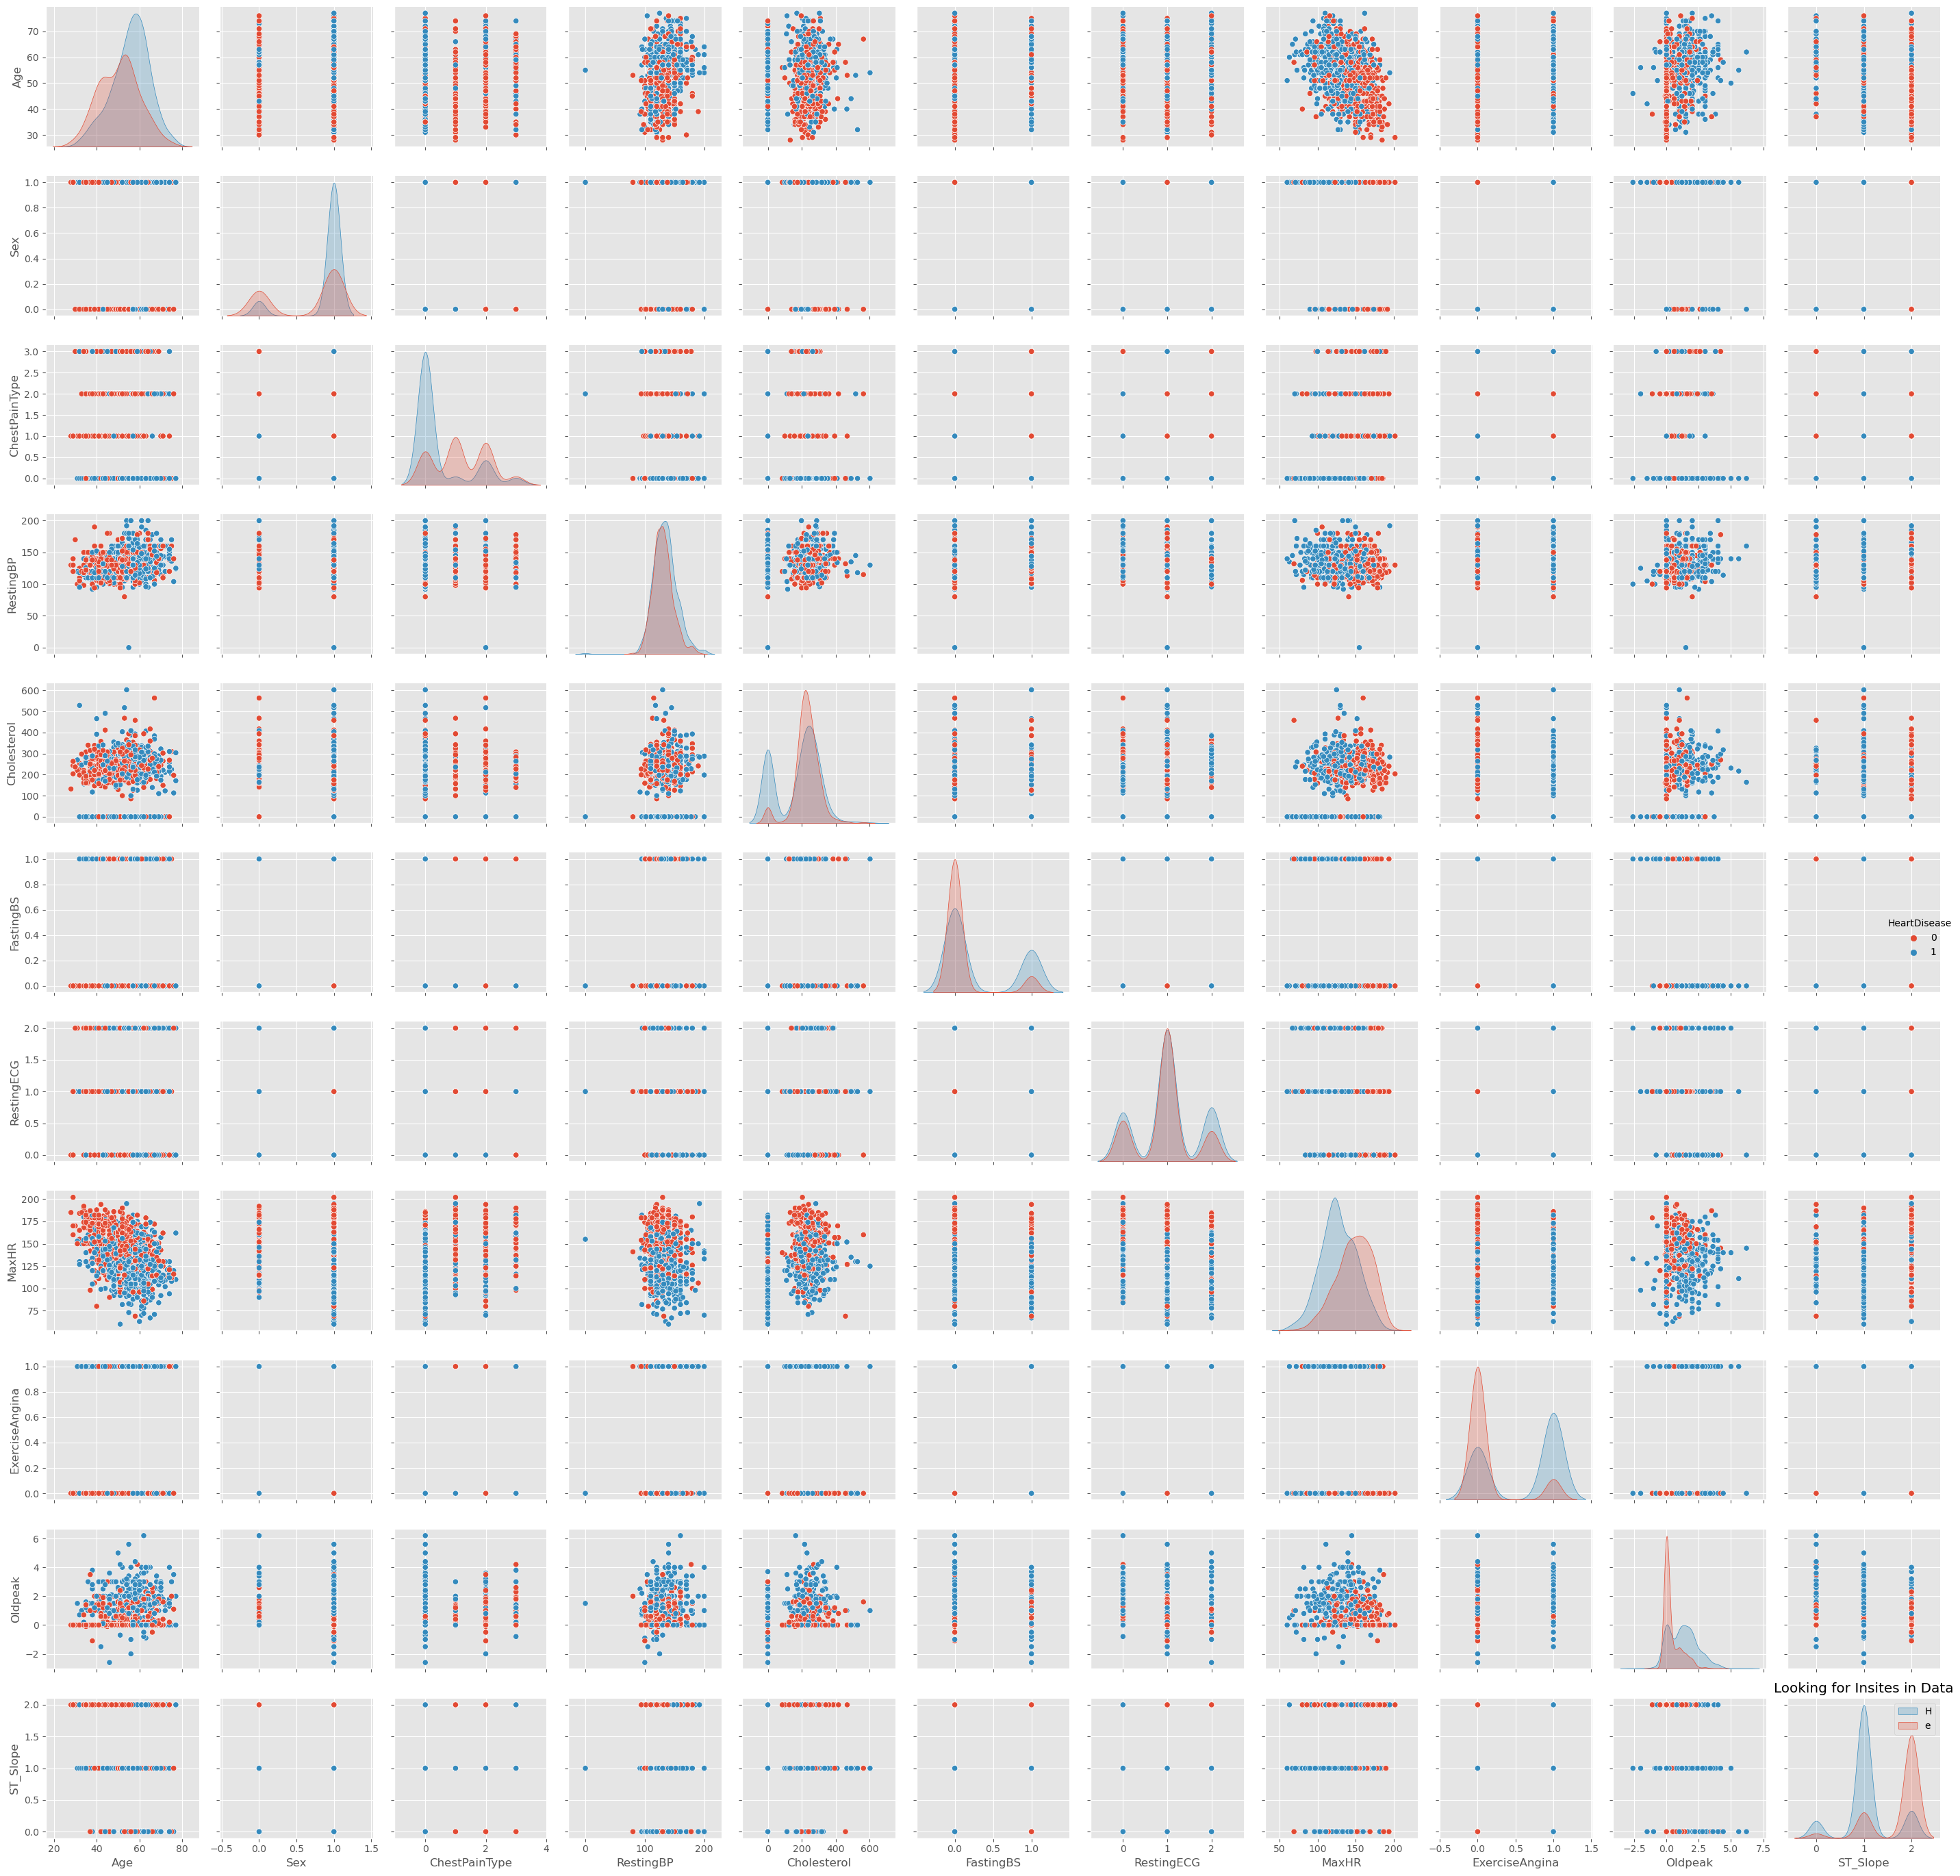

In [54]:
plt.figure(figsize=(15,10))
sns.pairplot(heart,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

Now to check the linearity of the variables it is a good practice to plot distribution graph and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

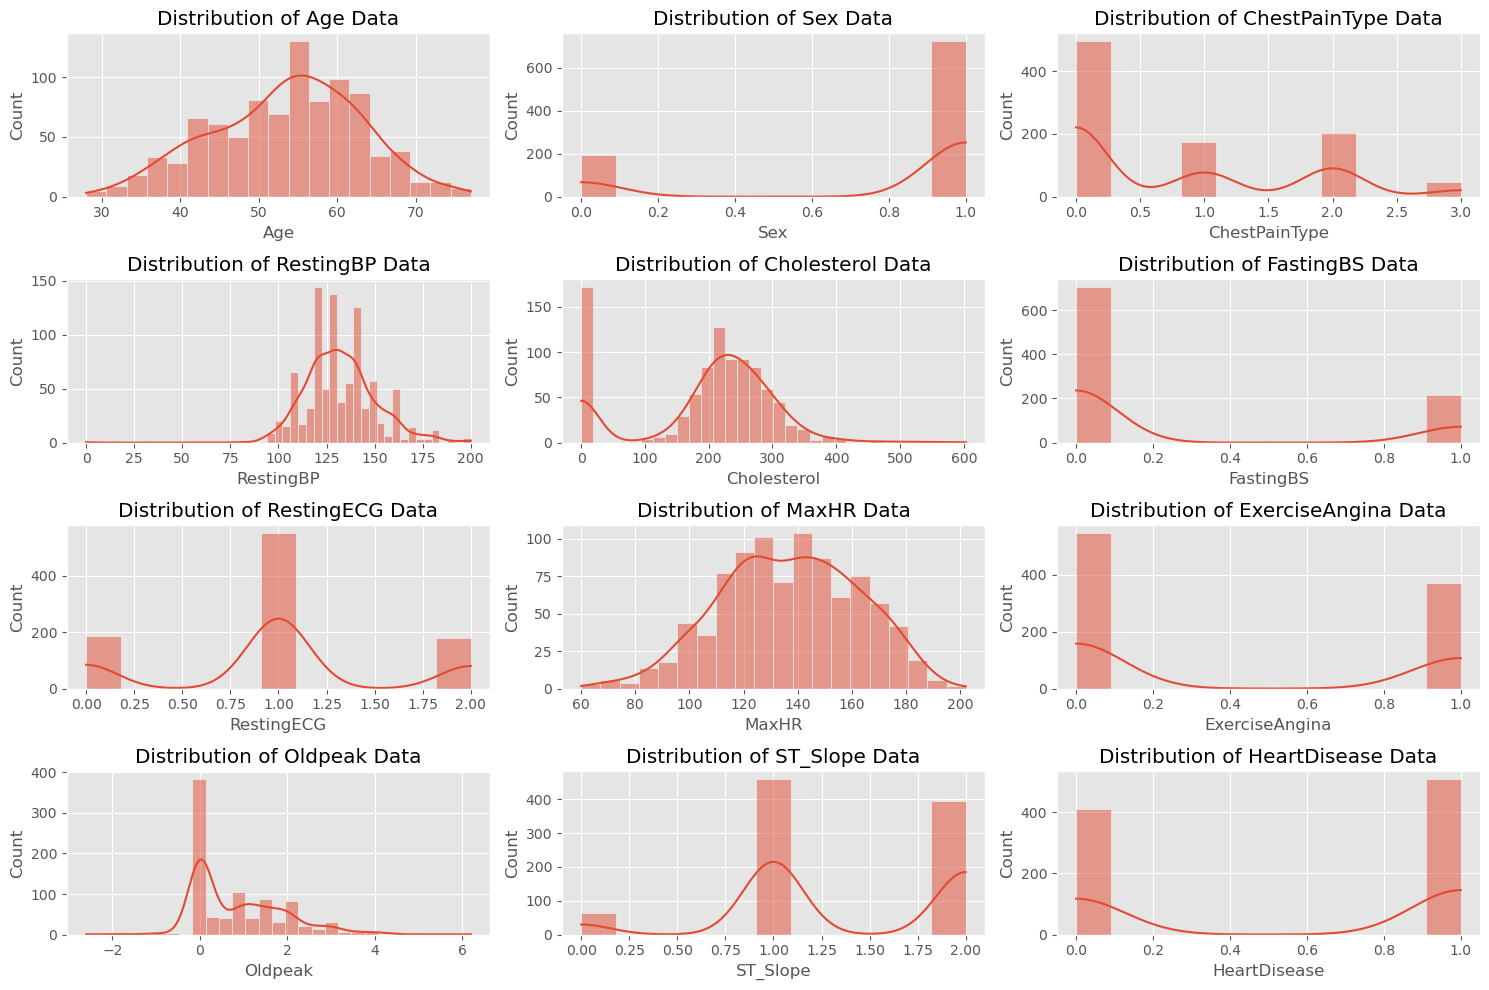

In [93]:
plt.figure(figsize=(15,10))
for i,col in enumerate(heart.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(heart[col],kde=True)
    plt.tight_layout()
    plt.plot()

## Outliers

A box plot shows the distribution of quantitative data in a way that facilitates comparisons between variables.The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.The box plot is a standardized way of displaying the distribution of data based on the five number summary:
* Minimum
* First quartile
* Median
* Third quartile
* Maximum.


In [56]:
fig = px.box(
    
    heart,
    y="Age",
    x="HeartDisease",
    title=f"Distrubution of Age")

fig.show()

In [57]:
fig = px.box(
    
    heart,
    y="RestingBP",
    x="HeartDisease",
    title=f"Distrubution of RestingBP",
    color="Sex")

fig.show()

In [58]:
fig = px.box(
    
    heart,
    y="Cholesterol",
    x="HeartDisease",
    title=f"Distrubution of Cholesterol")

fig.show()

In [59]:
fig = px.box(
    
    heart,
    y="Oldpeak",
    x="HeartDisease",
    title=f"Distrubution of Oldpeak")

fig.show()

In [60]:
fig = px.box(
    
    heart,y="MaxHR",
    x="HeartDisease",
    title=f"Distrubution of MaxHR")

fig.show()

### Data Preprocessing

Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.
* Handling Null Values
* Feature Scaling
* Handling Categorical Variables

##### 1. Handeling Null Values

In [61]:
# Checking for Type of data
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [62]:
# Checking for NULLs in the data
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

We can see our data does not have any null values but in case we have missing values, we can remove the data as well.

##### 2. Feature Scaling

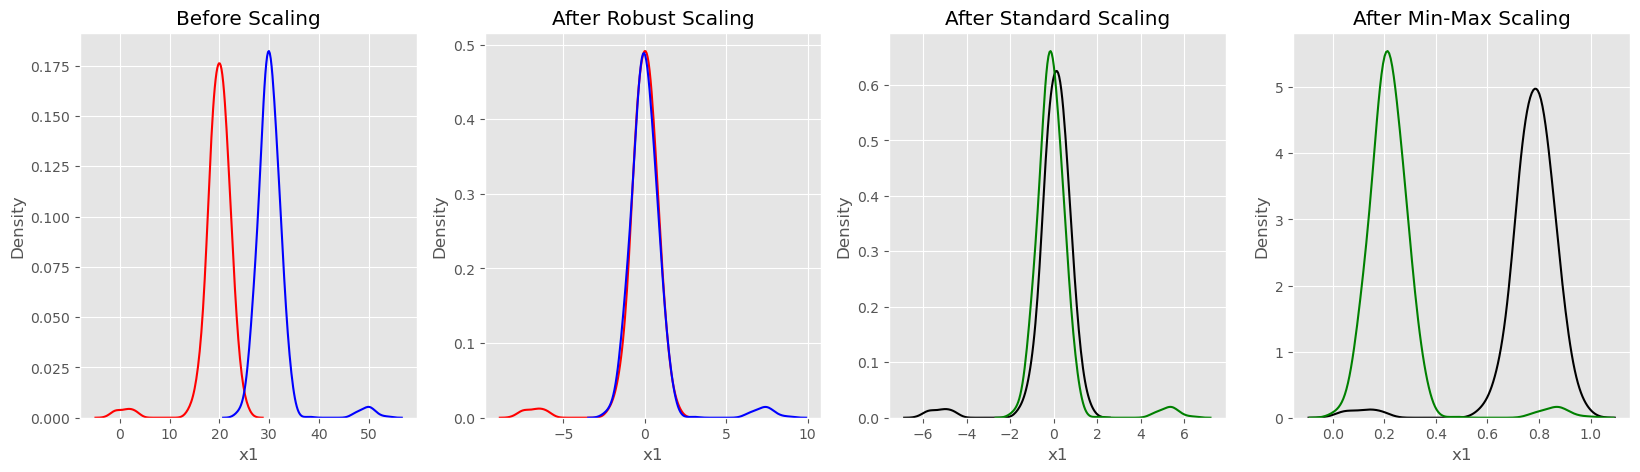

In [63]:
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal
 
scaler = preprocessing.RobustScaler()
robust_heart = scaler.fit_transform(x)
robust_heart = pd.DataFrame(robust_heart, columns =['x1', 'x2'])
 
scaler = preprocessing.StandardScaler()
standard_heart = scaler.fit_transform(x)
standard_heart = pd.DataFrame(standard_heart, columns =['x1', 'x2'])
 
scaler = preprocessing.MinMaxScaler()
minmax_heart = scaler.fit_transform(x)
minmax_heart = pd.DataFrame(minmax_heart, columns =['x1', 'x2'])
 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
 
sns.kdeplot(robust_heart['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_heart['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
 
sns.kdeplot(standard_heart['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_heart['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
 
sns.kdeplot(minmax_heart['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_heart['x2'], ax = ax4, color ='g')
plt.show()

##### 3. Handling Categorical Variables

Categorical variables/features are any feature type can be classified into two major types:

* Nominal
* Ordinal

In [64]:
heart[string_col].head()
for col in string_col:
    print(f"The distribution of categorical values in the {col} is : ")
    print(heart[col].value_counts())

The distribution of categorical values in the Sex is : 
Sex
1    725
0    193
Name: count, dtype: int64
The distribution of categorical values in the ChestPainType is : 
ChestPainType
0    496
2    203
1    173
3     46
Name: count, dtype: int64
The distribution of categorical values in the RestingECG is : 
RestingECG
1    552
0    188
2    178
Name: count, dtype: int64
The distribution of categorical values in the ExerciseAngina is : 
ExerciseAngina
0    547
1    371
Name: count, dtype: int64
The distribution of categorical values in the ST_Slope is : 
ST_Slope
1    460
2    395
0     63
Name: count, dtype: int64


In [65]:
heart_tree = heart.apply(LabelEncoder().fit_transform)
heart_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [66]:
## Creaeting one hot encoded features for working with non tree based algorithms 
heart_nontree=pd.get_dummies(heart,columns=string_col,drop_first=False)
heart_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_0,Sex_1,ChestPainType_0,...,ChestPainType_2,ChestPainType_3,RestingECG_0,RestingECG_1,RestingECG_2,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [67]:
# Getting the target column at the end
target="HeartDisease"
y=heart_nontree[target].values
heart_nontree.drop("HeartDisease",axis=1,inplace=True)
heart_nontree=pd.concat([heart_nontree,heart[target]],axis=1)
heart_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,ChestPainType_0,ChestPainType_1,...,ChestPainType_3,RestingECG_0,RestingECG_1,RestingECG_2,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_0,ST_Slope_1,ST_Slope_2,HeartDisease
0,40,140,289,0,172,0.0,False,True,False,True,...,False,False,True,False,True,False,False,False,True,0
1,49,160,180,0,156,1.0,True,False,False,False,...,False,False,True,False,True,False,False,True,False,1
2,37,130,283,0,98,0.0,False,True,False,True,...,False,False,False,True,True,False,False,False,True,0
3,48,138,214,0,108,1.5,True,False,True,False,...,False,False,True,False,False,True,False,True,False,1
4,54,150,195,0,122,0.0,False,True,False,False,...,False,False,True,False,True,False,False,False,True,0


##### 1.Using Logistic Regression :

Logistic regression is a calculation used to predict a binary outcome: either something happens, or does not. This can be exhibited as Yes/No, Pass/Fail, Alive/Dead, etc.

Independent variables are analyzed to determine the binary outcome with the results falling into one of two categories. The independent variables can be categorical or numeric, but the dependent variable is always categorical. Written like this:

P(Y=1|X) or P(Y=0|X)

In [68]:
# extracting the coloumn and removing the target coloumn
feature_col_nontree=heart_nontree.columns.to_list()
feature_col_nontree.remove(target)

In [88]:
# stratified k-fold cross-validation using logistic regression

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
acc_log=[] # list to store accuracy scores for each fold

kf = model_selection.StratifiedKFold(n_splits=5)
# iterating for each fold in traing and validation fold
for fold , (train_,val_) in enumerate(kf.split(X=heart_nontree,y=y)):
    
    # extracting feature and target values for the training set
    X_train=heart_nontree.loc[train_,feature_col_nontree]
    y_train=heart_nontree.loc[train_,target]
    
    # extracting feature and target values for the validation set
    X_valid=heart_nontree.loc[val_,feature_col_nontree]
    y_valid=heart_nontree.loc[val_,target]
    
    # scaling the features using Min-Max Scaler
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    # training the logistic regression model
    clf=LogisticRegression()
    clf.fit(X_train,y_train)
    
    # predictions on validation set
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        82
           1       0.93      0.83      0.88       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

The accuracy for Fold 1 : 0.8800813008130083
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        82
           1       0.91      0.80      0.85       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

The accuracy for Fold 2 : 0.8531802965088474
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                       

##### 2.Using Naive Bayers

Naïve Bayes is one of the generative modeling learning algorithms meaning that it aims to estimate the probability density or propensity of the inputs belonging to a particular class or category. In contrast to other discriminative models or techniques such as logistic regression, it is not capable of learning which features are decisive for the choice between separate classes.

In [89]:
# stratified k-fold cross-validation using Naive Bayes

from sklearn.naive_bayes import GaussianNB

acc_Gauss=[] # list to store accuracy scores for Gaussian Naive Bayes

# initialize StratifiedKFold with 5 splits
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (train_,val_) in enumerate(kf.split(X=heart_nontree,y=y)):
    
    # get training data
    X_train=heart_nontree.loc[train_,feature_col_nontree]
    y_train=heart_nontree.loc[train_,target]
    
    # get validation data
    X_valid=heart_nontree.loc[val_,feature_col_nontree]
    y_valid=heart_nontree.loc[val_,target]
    
    # scale features using Min-Max Scaler
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    # train Gaussian Naive Bayes model
    clf=GaussianNB()
    clf.fit(X_train,y_train)
    
    # predictions on validation set
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Gauss.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        82
           1       0.93      0.79      0.86       102

    accuracy                           0.85       184
   macro avg       0.86      0.86      0.85       184
weighted avg       0.87      0.85      0.85       184

The accuracy for 1 : 0.8604734576757532
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        82
           1       0.93      0.85      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

The accuracy for 2 : 0.8837876614060258
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.63      0.76        82
           1       0.77      0.98      0.86       102

    accuracy                           0.83  

##### 3. Support Vector Machines

A support vector machine (SVM) uses algorithms to train and classify data within degrees of polarity, taking it to a degree beyond X/Y prediction.

In [90]:
# stratified k-fold cross-validation using SVM 
from sklearn.svm import SVC

# list to store accuracy scores for SVM
acc_svm=[]

# initialize StratifiedKFold with 5 splits
kf=model_selection.StratifiedKFold(n_splits=5)

# Iterate over each fold
for fold , (train_,val_) in enumerate(kf.split(X=heart_nontree,y=y)):
    
    # training data
    X_train=heart_nontree.loc[train_,feature_col_nontree]
    y_train=heart_nontree.loc[train_,target]
    
    # validation data
    X_valid=heart_nontree.loc[val_,feature_col_nontree]
    y_valid=heart_nontree.loc[val_,target]
    
    # scale features using Min-Max Scaler
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    # train SVM model with linear kernel
    clf=SVC(kernel="linear")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        82
           1       0.92      0.82      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

The accuracy for 1 : 0.8690817790530847
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.91      0.84        82
           1       0.92      0.78      0.85       102

    accuracy                           0.84       184
   macro avg       0.85      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8494739359158296
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                           0.83  

##### K-nearest Neighbors

The optimal K value usually found is the square root of N, where N is the total number of samples.



In [92]:
from sklearn.neighbors import KNeighborsClassifier
acc_KNN=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=heart_nontree,y=y)):
    
    X_train=heart_nontree.loc[trn_,feature_col_nontree]
    y_train=heart_nontree.loc[trn_,target]
    
    X_valid=heart_nontree.loc[val_,feature_col_nontree]
    y_valid=heart_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=KNeighborsClassifier(n_neighbors=32)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_KNN.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        82
           1       0.93      0.93      0.93       102

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184

The accuracy for 1 : 0.9230033476805357
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        82
           1       0.91      0.79      0.85       102

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8482783357245336
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.92      0.72      0.81        82
           1       0.81      0.95      0.87       102

    accuracy                           0.85  

So, here from all the 4 algorithms we can observe that KNN predicts highest accuracy among the others of 92.30%, Naive Bayes with 88.37% and next was Logistic Regression with 88% and the last was SVM with 86.90%.